In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('wa comps.xlsx')

In [3]:
len(df)

10458

In [4]:
df.head()

,type,date,price,area,unit,address,Per Acre Value
0,Sold,2021-10-22,3000,0.010009,acre lot,"530 Ne Ste Route, Darrington, WA 98241",3000.0
1,Sold,2021-11-19,3600,0.350000,acre lot,"12603 107th Street Ct, Anderson Island, WA 98303",3600.0
2,Sold,2022-02-11,4500,0.121671,acre lot,"SW 98th St Lot 1, Lakewood, WA 98498",4500.0
3,Sold,2022-02-11,5000,0.174472,acre lot,"77th E, Sumner, WA 98390",5000.0
4,Sold,2021-11-17,5000,0.310000,acre lot,"Bayshore Dr, Bellingham, WA 98226",5000.0


In [5]:
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [6]:
#df=df[['Per Acre Value','Year']]
df=pd.DataFrame(df)
dt = df
dt['Per Acre Value'] = dt['Per Acre Value'].apply(remove_sign,sign='$')
sns.boxplot(y='Per Acre Value', x='Year',data=dt[['Per Acre Value','Year']])
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

KeyError: "['Year'] not in index"

# Setting UP IQR Value

In [7]:
au =dt['Per Acre Value'].quantile(0.75)
bu= dt['Per Acre Value'].quantile(0.775) 
cu =dt['Per Acre Value'].quantile(0.80)
du =dt['Per Acre Value'].quantile(0.825)
eu =dt['Per Acre Value'].quantile(0.85)
fu =dt['Per Acre Value'].quantile(0.875)
gu =dt['Per Acre Value'].quantile(0.90)      
hu =dt['Per Acre Value'].quantile(0.925)     
iu =dt['Per Acre Value'].quantile(0.95)     
ju =dt['Per Acre Value'].quantile(0.975)    
ku =dt['Per Acre Value'].quantile(0.99)
lu =dt['Per Acre Value'].quantile(0.999)

In [8]:
data = {'Per Acre Value':[au,bu,cu,du,eu,fu,gu,hu,iu,ju,ku,lu],
        'Upper Percentile Value':['75% quantile', '77.5% quantile', '80% quantile', '82.5% quantile','85% quantile','87.5% quantile',
                            '90% quantile','92.5% quantile','95% quantile','97.5% quantile','99% quantile','99.9% quantile'],
       'Spread':[0,bu-au,cu-bu,du-cu,eu-du,fu-eu,gu-fu,hu-gu,iu-hu,ju-iu,ku-ju,lu-ku]}
  
# Create DataFrame
df_upper = pd.DataFrame(data)

In [9]:
df_upper

,Per Acre Value,Upper Percentile Value,Spread
0,1.582385e+05,75% quantile,0.000000e+00
1,1.750000e+05,77.5% quantile,1.676148e+04
2,1.917024e+05,80% quantile,1.670242e+04
3,2.123059e+05,82.5% quantile,2.060345e+04
4,2.475743e+05,85% quantile,3.526840e+04
5,2.899438e+05,87.5% quantile,4.236948e+04
6,3.499647e+05,90% quantile,6.002095e+04
7,4.250000e+05,92.5% quantile,7.503530e+04
8,5.749568e+05,95% quantile,1.499568e+05
9,9.500000e+05,97.5% quantile,3.750432e+05


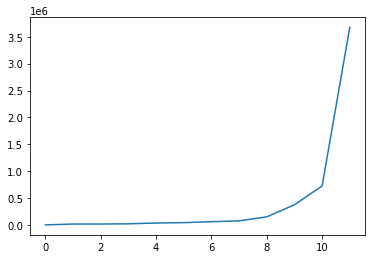

In [10]:
plt.plot(df_upper.index,df_upper['Spread'])

In [11]:
al =dt['Per Acre Value'].quantile(0.25)
bl= dt['Per Acre Value'].quantile(0.225) 
cl =dt['Per Acre Value'].quantile(0.20)
dl =dt['Per Acre Value'].quantile(0.175)
el =dt['Per Acre Value'].quantile(0.15)
fl =dt['Per Acre Value'].quantile(0.125)
gl =dt['Per Acre Value'].quantile(0.10)      
hl =dt['Per Acre Value'].quantile(0.085)     
il =dt['Per Acre Value'].quantile(0.05)     
jl =dt['Per Acre Value'].quantile(0.025)    
kl =dt['Per Acre Value'].quantile(0.01)
ll =dt['Per Acre Value'].quantile(0.001)

In [12]:
data1 = {'Per Acre Value':[al,bl,cl,dl,el,fl,gl,hl,il,jl,kl,ll],
        'Upper Percentile Value':['25% quantile', '22.5% quantile', '20% quantile', '17.5% quantile','15% quantile','12.5% quantile',
                            '10% quantile','8.5% quantile','5% quantile','2.5% quantile','1% quantile','0.1% quantile'],
        'Spread':[0,bl-al,cl-bl,dl-cl,el-dl,fl-el,gl-fl,hl-gl,il-hl,jl-il,kl-jl,ll-kl]}
  
# Create DataFrame
df_lower = pd.DataFrame(data1)

In [13]:
df_lower

,Per Acre Value,Upper Percentile Value,Spread
0,25000.000000,25% quantile,0.000000
1,22000.000000,22.5% quantile,-3000.000000
2,19290.000000,20% quantile,-2710.000000
3,16500.000000,17.5% quantile,-2790.000000
4,14072.052844,15% quantile,-2427.947156
5,11500.000000,12.5% quantile,-2572.052844
6,9416.432524,10% quantile,-2083.567476
7,8000.000000,8.5% quantile,-1416.432524
8,5000.000000,5% quantile,-3000.000000
9,2981.008674,2.5% quantile,-2018.991326


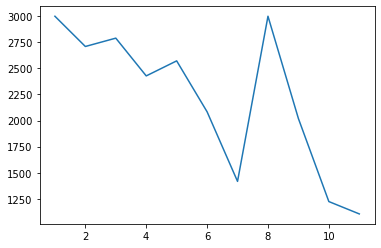

In [14]:
plt.plot(df_lower.index[1:],-df_lower['Spread'][1:])

In [15]:
def remove_outlier_IQR(data,low,high):
    Q1=data.quantile(low)
    Q3=data.quantile(high)
    IQR=Q3-Q1
    df_final=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    return df_final

In [17]:
df_outlier_removed=remove_outlier_IQR(dt['Per Acre Value'],0.25,0.65)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=dt.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=dt.drop([ind_diff[i]])
    dt=df_final
    
sns.boxplot(y='Per Acre Value', x='Year',data=df_final[['Per Acre Value','Year']])
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

KeyError: "['Year'] not in index"

In [18]:
len(ind_diff)

834

In [19]:
df_final

,type,date,price,area,unit,address,Per Acre Value
0,Sold,2021-10-22,3000,0.010009,acre lot,"530 Ne Ste Route, Darrington, WA 98241",3000.000000
1,Sold,2021-11-19,3600,0.350000,acre lot,"12603 107th Street Ct, Anderson Island, WA 98303",3600.000000
2,Sold,2022-02-11,4500,0.121671,acre lot,"SW 98th St Lot 1, Lakewood, WA 98498",4500.000000
3,Sold,2022-02-11,5000,0.174472,acre lot,"77th E, Sumner, WA 98390",5000.000000
4,Sold,2021-11-17,5000,0.310000,acre lot,"Bayshore Dr, Bellingham, WA 98226",5000.000000
...,...,...,...,...,...,...,...
10439,For Sale,NaT,7900000,1048.600000,acre lot,"SW O Rd,_x000D_\nRoyal City, WA 99357",7533.854663
10441,Pending,NaT,8500000,105.000000,acre lot,"Dent Rd,_x000D_\nPasco, WA 99301",80952.380952
10443,Pending,NaT,9455000,128.000000,acre lot,"Nka River Rd,_x000D_\nSequim, WA 98382",73867.187500
10449,For Sale,NaT,10495000,253.400000,acre lot,"1000 Discovery Dr SW,_x000D_\nIlwaco, WA 98624",41416.732439


In [20]:
print(df_final[df_final['Per Acre Value'].astype(str).str.contains('331')])

          type       date    price    area      unit  \
333       Sold 2002-03-04    32000   18.14  acre lot   
967       Sold 2021-12-17    64900   19.90  acre lot   
1005      Sold 2001-10-08    65000   20.31  acre lot   
1047      Sold 2021-10-15    67000    5.19  acre lot   
1170      Sold 2022-03-23    73000    5.01  acre lot   
1474      Sold 2021-11-23    87000   21.31  acre lot   
1502      Sold 2021-12-29    89900    1.63  acre lot   
2504      Sold 2022-03-18   149000    4.49  acre lot   
2728      Sold 2021-12-13   160875    2.41  acre lot   
2733      Sold 2021-10-20   162500    1.22  acre lot   
3439      Sold 2022-03-16   220000    2.29  acre lot   
3662      Sold 2021-12-30   250000   15.13  acre lot   
3796      Sold 2022-01-21   275000    2.87  acre lot   
4752      Sold 2022-03-18   730000   22.00  acre lot   
5007      Sold 2021-12-17  1807000   19.15  acre lot   
5009      Sold 2021-09-30  1825000   37.16  acre lot   
6451  For Sale        NaT    99950    7.85  acre

In [21]:
len(dt)

8007

# Standard IQR Process

In [23]:
df=pd.read_excel('wa comps.xlsx')

In [24]:
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

In [25]:
#df=df[['Per Acre Value','Year']]
df=pd.DataFrame(df)

df['Per Acre Value'] = df['Per Acre Value'].apply(remove_sign,sign='$')
sns.boxplot(y='Per Acre Value', x='Year',data=df[['Per Acre Value','Year']])
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

KeyError: "['Year'] not in index"

In [26]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [27]:
df_outlier_removed=remove_outlier_IQR(df['Per Acre Value'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='Per Acre Value', x='Year',data=df_final[['Per Acre Value','Year']])
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

KeyError: "['Year'] not in index"

In [28]:
len(ind_diff)

994

In [29]:
df_final

,type,date,price,area,unit,address,Per Acre Value
0,Sold,2021-10-22,3000,0.010009,acre lot,"530 Ne Ste Route, Darrington, WA 98241",3000.000000
1,Sold,2021-11-19,3600,0.350000,acre lot,"12603 107th Street Ct, Anderson Island, WA 98303",3600.000000
2,Sold,2022-02-11,4500,0.121671,acre lot,"SW 98th St Lot 1, Lakewood, WA 98498",4500.000000
3,Sold,2022-02-11,5000,0.174472,acre lot,"77th E, Sumner, WA 98390",5000.000000
4,Sold,2021-11-17,5000,0.310000,acre lot,"Bayshore Dr, Bellingham, WA 98226",5000.000000
...,...,...,...,...,...,...,...
10441,Pending,NaT,8500000,105.000000,acre lot,"Dent Rd,_x000D_\nPasco, WA 99301",80952.380952
10443,Pending,NaT,9455000,128.000000,acre lot,"Nka River Rd,_x000D_\nSequim, WA 98382",73867.187500
10449,For Sale,NaT,10495000,253.400000,acre lot,"1000 Discovery Dr SW,_x000D_\nIlwaco, WA 98624",41416.732439
10451,Pending,NaT,11000000,36.000000,acre lot,"18712 SE 1st St,_x000D_\nVancouver, WA 98684",305555.555556


In [30]:
len(df)

9464

In [31]:
ind_diff

Int64Index([ 4177,  4178,  4182,  4184,  4187,  4191,  4192,  4195,  4197,
             4201,
            ...
            10445, 10446, 10447, 10448, 10450, 10453, 10454, 10455, 10456,
            10457],
           dtype='int64', length=994)

In [32]:
df_final.to_csv('IQR ia Recently sold2.csv')